In [3]:
import torch
ip_radii  = torch.randn(100)
unknowns = torch.pi * (ip_radii ** 2)
torch.set_printoptions(precision=3, sci_mode=False)

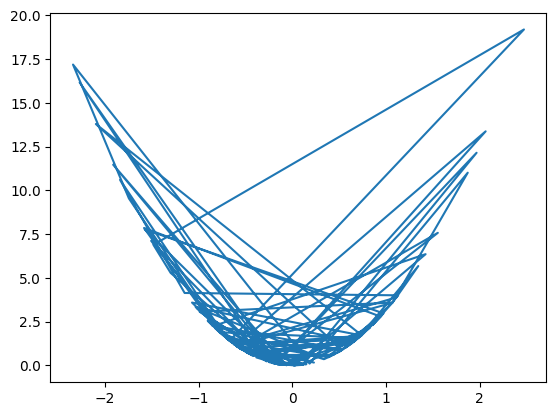

In [4]:
import matplotlib.pyplot as plt
plt.plot(ip_radii.numpy(), unknowns.numpy(), label='Area plot')

In [25]:
def linear_model(t_u, w, b):
    return w * t_u + b
def quadratic_model(t_u, w, b):
    return w * (t_u ** 2) + b
def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c) ** 2
    return sq_diff.mean()


In [26]:
w = torch.ones(())
b = torch.zeros(())
t_p = linear_model(ip_radii, w, b)
loss = loss_fn(t_p, unknowns)
print(loss)

t_p = quadratic_model(ip_radii, w, b)
loss = loss_fn(t_p, unknowns)
print(loss)

tensor(32.619)
tensor(14.959)


In [55]:
def training_loop(n_epochs, model, show_loss, learning_rate, params, ip_radii, unknowns):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
            
        t_p = model(ip_radii, *params)
        loss = loss_fn(t_p, unknowns)
        if (epoch % 100 == 0) and show_loss:
            print(loss)
        loss.backward()

        with torch.no_grad():
            params -= learning_rate * params.grad

    return (params, loss)

In [51]:
learning_rate = 1e-2
n_epochs = 1000
params = torch.tensor([1., 0.], requires_grad = True)
ip_radii = torch.randn(100)
unknowns = torch.pi * (ip_radii ** 2)

In [60]:
prams, loss = training_loop(n_epochs, linear_model, True, learning_rate, params, ip_radii, unknowns)
print(f"Parameter : {params}, Loss :{loss}")
print(f"pi is {params[0]}")

tensor(20.731, grad_fn=<MeanBackward0>)
tensor(20.731, grad_fn=<MeanBackward0>)
tensor(20.731, grad_fn=<MeanBackward0>)
tensor(20.731, grad_fn=<MeanBackward0>)
tensor(20.731, grad_fn=<MeanBackward0>)
tensor(20.731, grad_fn=<MeanBackward0>)
tensor(20.731, grad_fn=<MeanBackward0>)
tensor(20.731, grad_fn=<MeanBackward0>)
tensor(20.731, grad_fn=<MeanBackward0>)
tensor(20.731, grad_fn=<MeanBackward0>)
Parameter : tensor([0.427, 3.251], requires_grad=True), Loss :20.731401443481445
pi is 0.4271622598171234


In [61]:
prams, loss =  training_loop(n_epochs, quadratic_model, True, learning_rate, params, ip_radii, unknowns)
print(f"Parameter : {params}, Loss :{loss}")
print(f"pi is {params[0]}")

tensor(0.919, grad_fn=<MeanBackward0>)
tensor(0.087, grad_fn=<MeanBackward0>)
tensor(0.008, grad_fn=<MeanBackward0>)
tensor(0.001, grad_fn=<MeanBackward0>)
tensor(0.000, grad_fn=<MeanBackward0>)
tensor(0.000, grad_fn=<MeanBackward0>)
tensor(0.000, grad_fn=<MeanBackward0>)
tensor(0.000, grad_fn=<MeanBackward0>)
tensor(0.000, grad_fn=<MeanBackward0>)
tensor(0.000, grad_fn=<MeanBackward0>)
Parameter : tensor([3.142, 0.000], requires_grad=True), Loss :5.849244422151401e-10
pi is 3.1415815353393555
